# Predicting heart_disease using machine learning model

We are going to take following approch :

1. Problem Defination
2. Data
3. Evaluation
4. Feature
5. Modlling
6. Experimental

## 1. Problem defination

> Building a machine learning model to predict whether the person have heart disease or not based on there medical attribute.

## 2. Data 

> The original data come from the cleavland database from the UCI machine learning repositery: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

> There is also version of this data available on Kaggle : https://www.kaggle.com/ronitf/heart-disease-uci

## 3. Evaluation

> If we can reach 95% accuracy . we persue our project

## 4. Features

Create data dictionary

age - age in years

sex - (1 = male; 0 = female)

cp - chest pain type

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern

chol - serum cholestoral in mg/dl

serum = LDL + HDL + .2 * triglycerides

above 200 is cause for concern

fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

'>126' mg/dL signals diabetes

restecg - resting electrocardiographic results

0: Nothing to note

1: ST-T Wave abnormality

can range from mild symptoms to severe problems

signals non-normal heart beat

2: Possible or definite left ventricular hypertrophy

Enlarged heart's main pumping chamber

thalach - maximum heart rate achieved

exang - exercise induced angina (1 = yes; 0 = no)

oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will 

stress more

slope - the slope of the peak exercise ST segment

0: Upsloping: better heart rate with excercise (uncommon)

1: Flatsloping: minimal change (typical healthy heart)

2: Downslopins: signs of unhealthy heart

ca - number of major vessels (0-3) colored by flourosopy

colored vessel means the doctor can see the blood passing through

the more blood movement the better (no clots)

thal - thalium stress result

1,3: normal

6: fixed defect: used to be defect but ok now

7: reversable defect: no proper blood movement when excercising

target - have disease or not (1=yes, 0=no) (= the predicted attribute)



In [1]:
# importing tools that we need

# Regular EDA (exploratory data analysis) and ploting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Importing models

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model Evaluation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import plot_roc_curve

In [2]:
# Load Data

df=pd.read_csv('heart_disease.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Explore the data (Exploratory data analysis or EDA)

To Know more about the data :

    1. What questions are u trying to solve ?
    2. What kind of Data we have ?
    3. What's missing from the data how to deal with that ?
    4. Where are outlier Why should we care about them ?
    5. How we can add, change and remove feature to get more about data

In [3]:
# Let's find out how many class is there

df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

#### It show's the balance classification problem

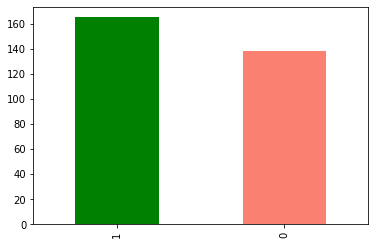

In [4]:
df['target'].value_counts().plot(kind="bar",color=['green','salmon']);

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [8]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [9]:
# Compare sex attribute with target variable using Crosstab

pd.crosstab(df['sex'],df['target'],margins=True)

target,0,1,All
sex,,,
0,24,72,96
1,114,93,207
All,138,165,303


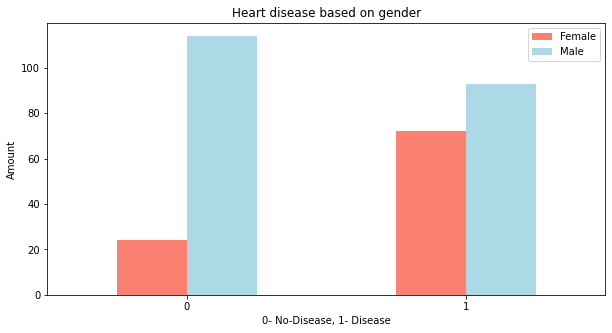

In [10]:
#plot graph

pd.crosstab(df['target'],df['sex']).plot(kind="bar",
                                        color=['salmon','lightblue'],
                                        figsize=(10,5))

plt.title("Heart disease based on gender")
plt.xlabel("0- No-Disease, 1- Disease")
plt.ylabel("Amount")
plt.legend(['Female','Male'])
plt.xticks(rotation=0);

### Age Vs. Max-Heart-Rate for heart disease

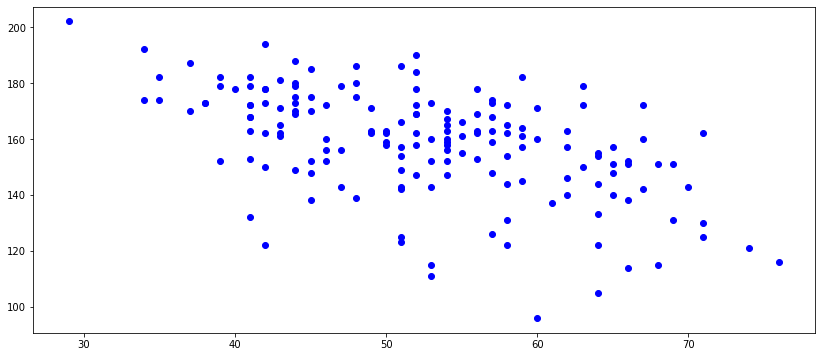

In [11]:
# HAving Dissease

plt.figure(figsize=(14,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='blue')

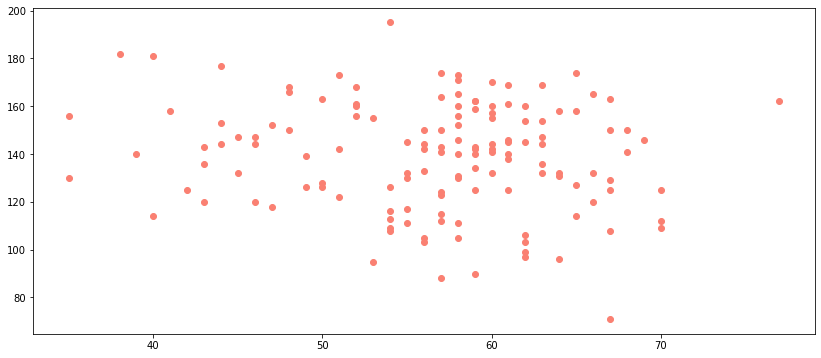

In [12]:
# No Disease
plt.figure(figsize=(14,6))
plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color=['salmon']);

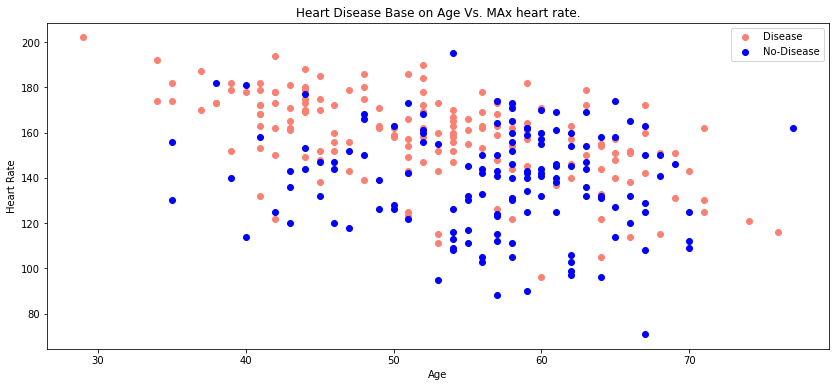

In [13]:
# HAving Disease and No disease\

plt.figure(figsize=(14,6))

plt.scatter(df.age[df.target==1],
           df.thalach[df.target==1],
           color='salmon')

plt.scatter(df.age[df.target==0],
           df.thalach[df.target==0],
           color=['blue'])

plt.title("Heart Disease Base on Age Vs. MAx heart rate.")
plt.xlabel("Age")
plt.ylabel("Heart Rate")
plt.legend(['Disease','No-Disease'])
plt.show()

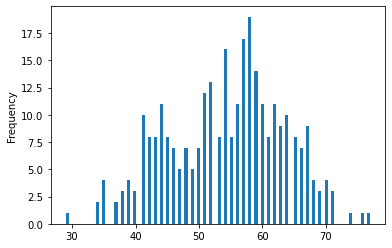

In [14]:
df.age.plot(kind="hist",bins=100);

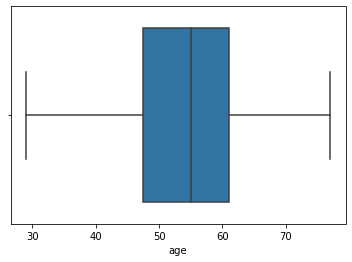

In [15]:
# Box plot for age

sns.boxplot(x=df['age']);

### Heart Disease Frequency as per chest pain type

cp - chest pain type: 

0: Typical angina: chest pain related decrease blood supply to the heart

1: Atypical angina: chest pain not related to heart

2: Non-anginal pain: typically esophageal spasms (non heart related)

3: Asymptomatic: chest pain not showing signs of disease

In [16]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


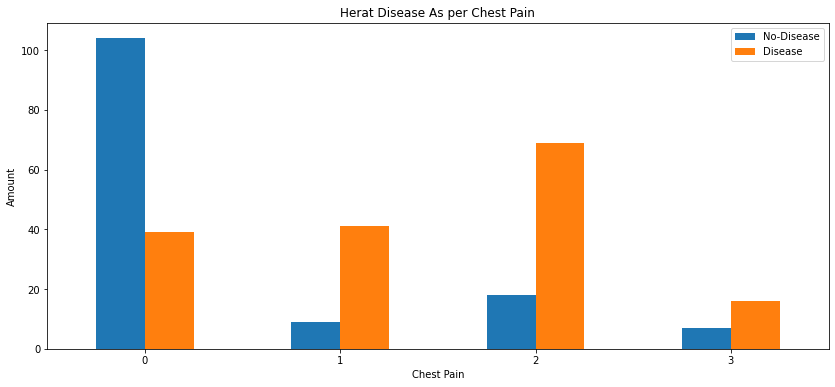

In [17]:
pd.crosstab(df['cp'],df['target']).plot(kind='bar',figsize=(14,6))

plt.title("Herat Disease As per Chest Pain")
plt.xlabel("Chest Pain")
plt.ylabel("Amount")
plt.legend(['No-Disease','Disease'])
plt.xticks(rotation=0)
plt.show()

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
# Relation Ship between independent variable
# Correlation between varibles
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


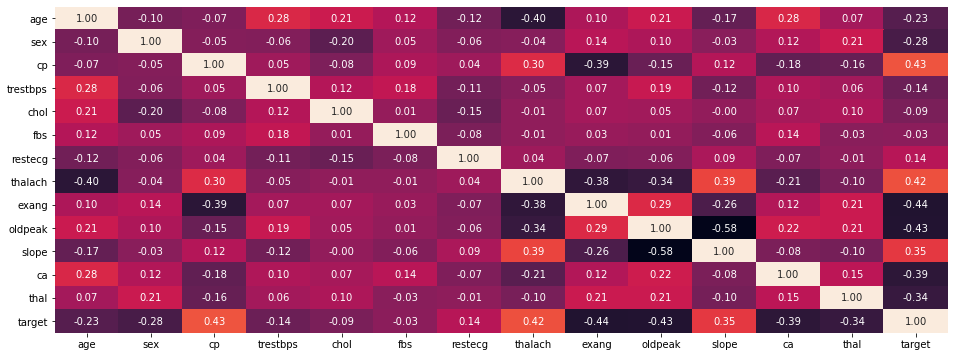

In [20]:
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(16,6))
ax=sns.heatmap(corr_matrix,
              annot=True,
              fmt=".2f",
              
              cbar=False)

### Modling 

In [21]:
# Split the data into x and y

X=df.drop('target',axis=1)
y=df['target']

In [22]:
# Split the data into train and test
np.random.seed(34)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [23]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
117,56,1,3,120,193,0,0,162,0,1.9,1,0,3
142,42,0,2,120,209,0,1,173,0,0.0,1,0,2
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3
33,54,1,2,125,273,0,0,152,0,0.5,0,1,2
62,52,1,3,118,186,0,0,190,0,0.0,1,0,1


In [24]:
# MOdels
np.random.seed(34)
models={'Logistic-Regression':LogisticRegression(),
        'KNN':KNeighborsClassifier(),
        'Random-Forest':RandomForestClassifier()}
results={}
for model_name,model in models.items():
    model.fit(X_train,y_train)
    results[model_name]=model.score(X_test,y_test)
results

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic-Regression': 0.8524590163934426,
 'KNN': 0.7049180327868853,
 'Random-Forest': 0.8852459016393442}

In [25]:
# MOdel Comparision

model_comparision=pd.DataFrame(results.values(),results.keys(),columns=['Accuracy'])

In [26]:
model_comparision

,Accuracy
Logistic-Regression,0.852459
KNN,0.704918
Random-Forest,0.885246


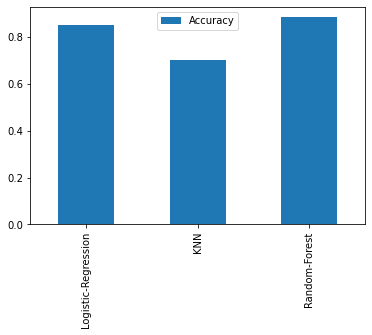

In [27]:
model_comparision.plot.bar();

### Now we've got a baseline model.. and we model first prediction aren't always what we should based our next step

So to do more 

Let's Look at the Following :

* Hyperparameter Tuning
* Feaure Importance
* Confusion matrix
* precision, recall, accuracy
* ROC curve
* AUC curve
* F1 score
* Classification Report
* Cross Validation

## Hyperparameter tuning (By hand)

In [28]:
# Let's tune KNN

train_score=[]
test_score=[]

# Setup KNN instance

knn=KNeighborsClassifier()

# Range of neighbors

neighbors=range(1,21)

# Loop Through Different nighbors

for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    # Update the training score
    
    train_score.append(knn.score(X_train,y_train))
    
    # Update test score
    
    test_score.append(knn.score(X_test,y_test))
    

Maximum Score For KNN 77.05%


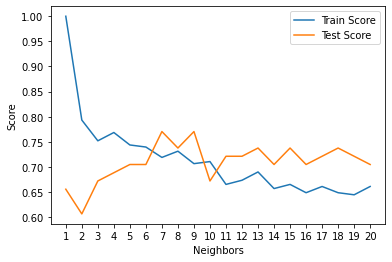

In [29]:
plt.plot(neighbors,train_score,label='Train Score')
plt.plot(neighbors,test_score,label='Test Score')
plt.xticks(np.arange(1,21,1))
plt.xlabel("Neighbors")
plt.ylabel("Score")
plt.legend()
print(f"Maximum Score For KNN {max(test_score)*100:.2f}%")
plt.show()



## Hyperparameter tunign using RandomSearchCV

We are going to tune :

    LogisticRegression
    RandomForestClassifier

In [30]:
# Create hyperparameter grid for LogisticRegression

lr_grid={"C":np.logspace(-4,4,20),
         "solver":["liblinear"]}
# Create hyperparameter grid for RandomForest

rf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,2,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

In [31]:
# Tune Logistic Regression
np.random.seed(34)
rs_lr=RandomizedSearchCV(LogisticRegression(),
                         param_distributions=lr_grid,
                         cv=8,
                         n_iter=20,
                        verbose=True)

# Fitting model

rs_lr.fit(X_train,y_train)

Fitting 8 folds for each of 20 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:    1.6s finished


RandomizedSearchCV(cv=8, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_lr.score(X_test,y_test)

0.8852459016393442

In [34]:
# Tune RandomForest
np.random.seed(34)
rs_rf=RandomizedSearchCV(RandomForestClassifier(),
                         param_distributions=rf_grid,
                         cv=8,
                         n_iter=20,
                         verbose=True
                        )

In [35]:
rs_rf.fit(X_train,y_train)

Fitting 8 folds for each of 20 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 160 out of 160 | elapsed:  3.0min finished


RandomizedSearchCV(cv=8, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 2, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [36]:
rs_rf.best_params_

{'n_estimators': 910,
 'min_samples_split': 4,
 'min_samples_leaf': 17,
 'max_depth': 2}

In [37]:
rs_rf.score(X_test,y_test)

0.8852459016393442

In [38]:
model_comparision

,Accuracy
Logistic-Regression,0.852459
KNN,0.704918
Random-Forest,0.885246


## Hyperparameter tuning using GridSearchCV



In [40]:
gs_lr=GridSearchCV(LogisticRegression(),
                   param_grid=lr_grid,
                   cv=5,
                   verbose=True)

gs_lr.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.9s finished


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [42]:
gs_lr.score(X_test,y_test)

0.8688524590163934

In [43]:
model_comparision

,Accuracy
Logistic-Regression,0.852459
KNN,0.704918
Random-Forest,0.885246


In [51]:
rf_grid={'n_estimators': [910],
         'min_samples_split': [4],
         'min_samples_leaf': [17],
         'max_depth': [2]}

In [55]:
gs_rf=GridSearchCV(RandomForestClassifier(),
                   param_grid=rf_grid,
                   cv=5,
                   verbose=True)

In [56]:
gs_rf.fit(X_train,y_train)
gs_rf.score(X_test,y_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   13.4s finished


0.8852459016393442

## Evalute the model

In [57]:
# Make prediction with tune model

y_preds=gs_rf.predict(X_test)

In [58]:
accuracy_score(y_preds,y_test)

0.8852459016393442

In [60]:
cm=confusion_matrix(y_preds,y_test)

In [61]:
cm

array([[23,  3],
       [ 4, 31]], dtype=int64)

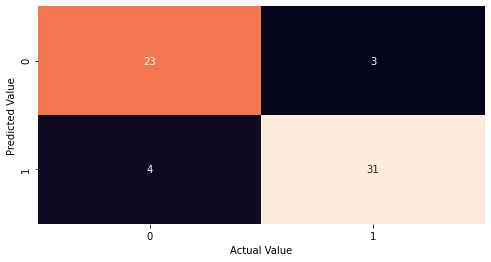

In [70]:
fig,ax=plt.subplots(figsize=(8,4))

ax=sns.heatmap(cm,
               annot=True,
               cbar=False)

plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.show()

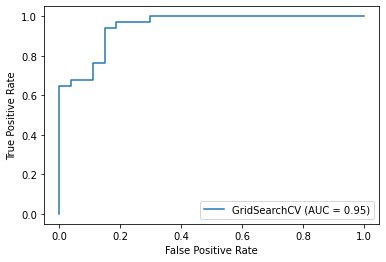

In [69]:
plot_roc_curve(gs_rf,X_test,y_test);

### Classification report

In [71]:
print(classification_report(y_preds,y_test))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87        26
           1       0.91      0.89      0.90        35

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.88        61
weighted avg       0.89      0.89      0.89        61



# Calcualte evalutation matric using cross metrics

using cross_val_score()

In [73]:
gs_rf.best_params_

{'max_depth': 2,
 'min_samples_leaf': 17,
 'min_samples_split': 4,
 'n_estimators': 910}

In [91]:
rs_lr.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [88]:
clf=RandomForestClassifier(max_depth=2,
                           min_samples_leaf= 17,
                           min_samples_split= 4,
                           n_estimators=910)

In [90]:
# Cross validated accuracy

from sklearn.model_selection import cross_val_score
cross_acc=cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring='accuracy')
np.mean(cross_acc)

0.8383060109289617

In [93]:
clf_log=LogisticRegression(solver ='liblinear',C= 0.23357214690901212)

cross_acc_log=cross_val_score(clf_log,
                              X,
                             y,
                             cv=5,
                             scoring='accuracy')

np.mean(cross_acc_log)

0.8479781420765027

In [95]:
# Precision

clf_log=LogisticRegression(solver ='liblinear',C= 0.23357214690901212)

cross_pre_log=cross_val_score(clf_log,
                              X,
                             y,
                             cv=5,
                             scoring='precision')

np.mean(cross_pre_log)

0.8215873015873015

In [96]:
clf_log=LogisticRegression(solver ='liblinear',C= 0.23357214690901212)

cross_recall_log=cross_val_score(clf_log,
                              X,
                             y,
                             cv=5,
                             scoring='accuracy')

np.mean(cross_recall_log)

0.8479781420765027

## Finding Most importance feature

#### Feature importance for logistic regression



In [97]:
clf=LogisticRegression(solver ='liblinear',C= 0.23357214690901212)

clf.fit(X_train,y_train)

LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [99]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [98]:
# Check Coef_

clf.coef_

array([[ 0.00394951, -0.82066503,  0.74266664, -0.01184952, -0.0021025 ,
        -0.07590226,  0.33984539,  0.02473329, -0.54359002, -0.47998071,
         0.29103888, -0.55873956, -0.61328019]])

In [100]:
# Match coef_ with feature of columns

feature_dict= dict(zip(df.columns,list(clf.coef_[0])))

In [101]:
feature_dict

{'age': 0.003949509730099161,
 'sex': -0.8206650342742982,
 'cp': 0.7426666433904096,
 'trestbps': -0.011849516320687389,
 'chol': -0.0021024978105601655,
 'fbs': -0.07590225632050834,
 'restecg': 0.3398453882230449,
 'thalach': 0.024733291155716614,
 'exang': -0.5435900214075674,
 'oldpeak': -0.479980714737553,
 'slope': 0.2910388771048609,
 'ca': -0.5587395605776471,
 'thal': -0.6132801899111585}

In [105]:
# Visualize

feature_df=pd.DataFrame(feature_dict,index=[0])

In [106]:
feature_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.00395,-0.820665,0.742667,-0.01185,-0.002102,-0.075902,0.339845,0.024733,-0.54359,-0.479981,0.291039,-0.55874,-0.61328


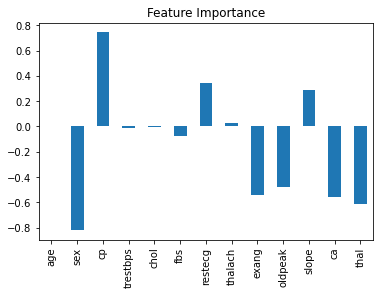

In [112]:
feature_df.T.plot.bar(legend=False,title="Feature Importance");